In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import time

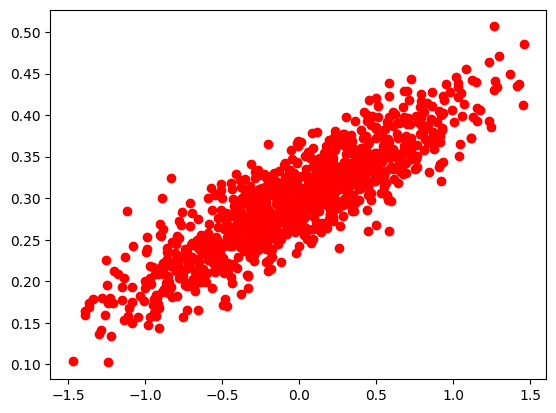

In [3]:
num_points = 1000
vectors_set = []

for i in range(num_points):
    x = np.random.normal(0.0, 0.55)
    y = x * 0.1 + 0.3 + np.random.normal(0.0, 0.03)

    vectors_set.append([x, y])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.plot(x_data, y_data, "ro", label="Original data")

W:  0.10025797905875021 b:  0.29943322732689676


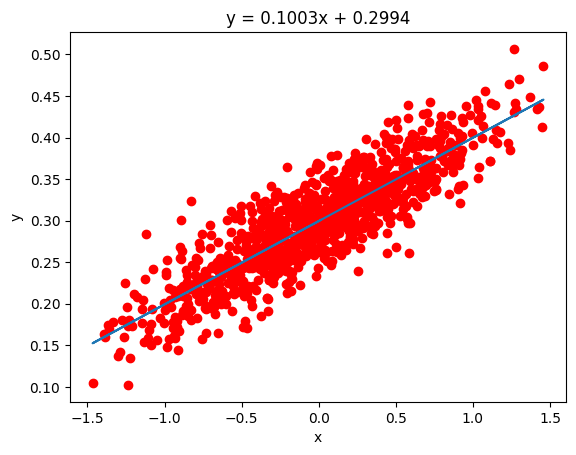

In [7]:
x_mean = sum(x_data) / num_points
y_mean = sum(y_data) / num_points

W = sum([(y - y_mean) * (x - x_mean) for y, x in list(zip(y_data, x_data))])
W /= sum([(x - x_mean) ** 2 for x in x_data])
b = y_mean - W * x_mean

print("W: ", W, "b: ", b)

pred_y = [W * x + b for x in x_data]

plt.plot(x_data, y_data, "ro")
plt.plot(x_data, pred_y)
plt.title(f"y = {round(W, 4)}x + {round(b, 4)}")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

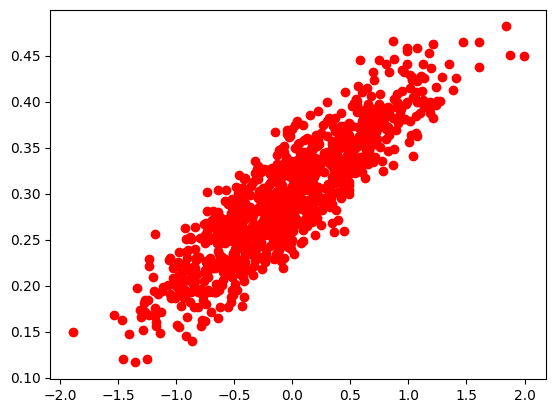

In [9]:
num_points = 1000
vectors_set = []

for i in range(num_points):
    x = np.random.normal(0.0, 0.55)
    y = x * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x, y])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.plot(x_data, y_data, "ro", label="Original data")

[Parameter containing:
tensor([[-0.9812]], requires_grad=True), Parameter containing:
tensor([0.0459], requires_grad=True)]
Epoch 0/100 loss: 0.4511971175670624
Epoch 10/100 loss: 0.09989778697490692
Epoch 20/100 loss: 0.024965902790427208
Epoch 30/100 loss: 0.006796577945351601
Epoch 40/100 loss: 0.002362180035561323
Epoch 50/100 loss: 0.0012795903021469712
Epoch 60/100 loss: 0.0010152887552976608
Epoch 70/100 loss: 0.0009507627692073584
Epoch 80/100 loss: 0.0009350095060653985
Epoch 90/100 loss: 0.000931163493078202
훈련 후 입력이 10일 때의 예측값 :  tensor([[1.2813]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[0.0982]], requires_grad=True), Parameter containing:
tensor([0.2998], requires_grad=True)]


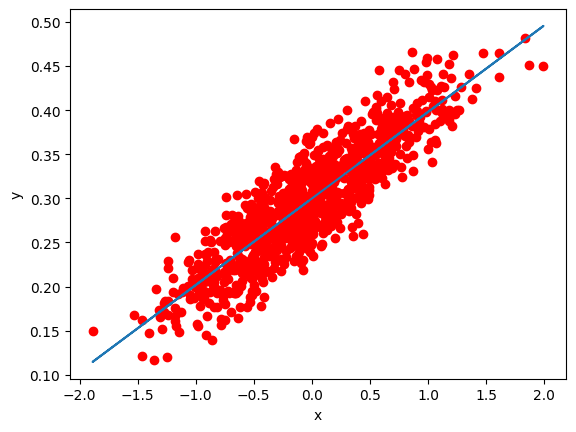

In [10]:
x_train = torch.FloatTensor(x_data).unsqueeze(dim=1)
y_train = torch.FloatTensor(y_data).unsqueeze(dim=1)

model = nn.Linear(1, 1)
print(list(model.parameters()))

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
nb_epochs = 100

for epoch in range(nb_epochs):
    prediction = model(x_train)
    loss = F.mse_loss(prediction, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{nb_epochs} loss: {loss.item()}")

new_var = torch.FloatTensor([[10.0]])
pred_y = model(new_var)
print("훈련 후 입력이 10일 때의 예측값 : ", pred_y)

print(list(model.parameters()))

plt.plot(x_data, y_data, "ro")
plt.plot(x_data, model(x_train).detach().numpy())
plt.xlabel("x")
plt.ylabel("y")
plt.show()

[Parameter containing:
tensor([[0.0166]], requires_grad=True), Parameter containing:
tensor([0.6695], requires_grad=True)]
Epoch 0/90 loss: 0.14132611453533173
Epoch 10/90 loss: 0.01859966479241848
Epoch 20/90 loss: 0.003389631863683462
Epoch 30/90 loss: 0.0013861163752153516
Epoch 40/90 loss: 0.0010641640983521938
Epoch 50/90 loss: 0.0009856735123321414
Epoch 60/90 loss: 0.0009564284700900316
Epoch 70/90 loss: 0.0009430144564248621
Epoch 80/90 loss: 0.0009364510769955814
훈련 후 입력이 10일 때의 예측값 :  tensor([[1.2597]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[0.0960]], requires_grad=True), Parameter containing:
tensor([0.2997], requires_grad=True)]


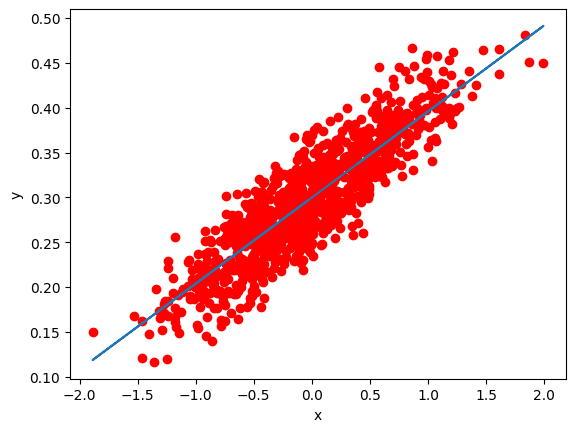

[Parameter containing:
tensor([[0.6965]], requires_grad=True), Parameter containing:
tensor([-0.3690], requires_grad=True)]
Epoch 0/100 loss: 0.5879461169242859
Epoch 10/100 loss: 0.1147012710571289
Epoch 20/100 loss: 0.03601296246051788
Epoch 30/100 loss: 0.01583123207092285
Epoch 40/100 loss: 0.008063114248216152
Epoch 50/100 loss: 0.004459479358047247
Epoch 60/100 loss: 0.0026909513399004936
Epoch 70/100 loss: 0.0018103548791259527
Epoch 80/100 loss: 0.0013703148579224944
Epoch 90/100 loss: 0.0011502327397465706
훈련 후 입력이 10일 때의 예측값 :  tensor([[1.4712]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[0.1171]], requires_grad=True), Parameter containing:
tensor([0.3004], requires_grad=True)]


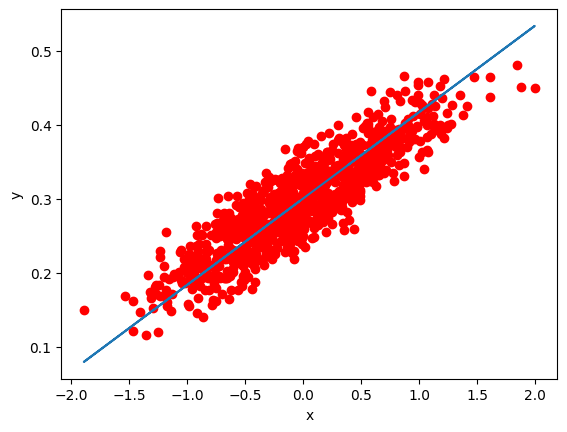

[Parameter containing:
tensor([[-0.9816]], requires_grad=True), Parameter containing:
tensor([0.4418], requires_grad=True)]
Epoch 0/110 loss: 0.4264034628868103
Epoch 10/110 loss: 0.2016676664352417
Epoch 20/110 loss: 0.0998842790722847
Epoch 30/110 loss: 0.05025631934404373
Epoch 40/110 loss: 0.025585277006030083
Epoch 50/110 loss: 0.013261876069009304
Epoch 60/110 loss: 0.007099033799022436
Epoch 70/110 loss: 0.004016167484223843
Epoch 80/110 loss: 0.0024739045184105635
Epoch 90/110 loss: 0.0017023448599502444
Epoch 100/110 loss: 0.0013163493713364005
훈련 후 입력이 10일 때의 예측값 :  tensor([[1.0518]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[0.0753]], requires_grad=True), Parameter containing:
tensor([0.2990], requires_grad=True)]


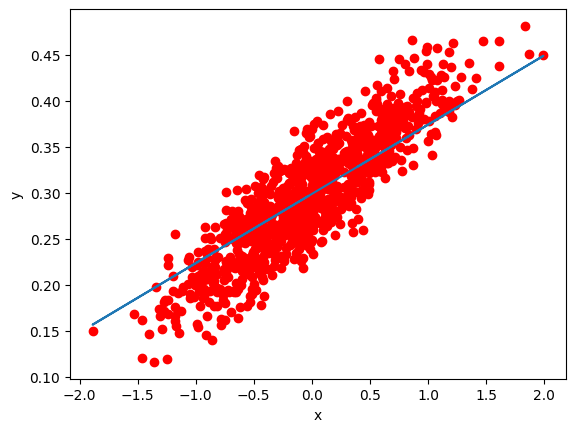

[Parameter containing:
tensor([[-0.1118]], requires_grad=True), Parameter containing:
tensor([-0.6192], requires_grad=True)]
Epoch 0/90 loss: 0.8519298434257507
Epoch 10/90 loss: 0.015345520339906216
Epoch 20/90 loss: 0.0022287298925220966
Epoch 30/90 loss: 0.0012215068563818932
Epoch 40/90 loss: 0.001000815536826849
Epoch 50/90 loss: 0.0009472259553149343
Epoch 60/90 loss: 0.0009341459372080863
Epoch 70/90 loss: 0.0009309526649303734
Epoch 80/90 loss: 0.0009301731479354203
훈련 후 입력이 10일 때의 예측값 :  tensor([[1.2865]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[0.0987]], requires_grad=True), Parameter containing:
tensor([0.2998], requires_grad=True)]


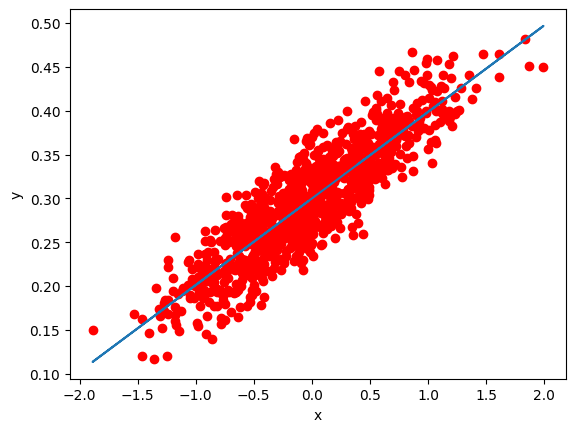

[Parameter containing:
tensor([[0.0678]], requires_grad=True), Parameter containing:
tensor([-0.7673], requires_grad=True)]
Epoch 0/100 loss: 1.1385396718978882
Epoch 10/100 loss: 0.014357786625623703
Epoch 20/100 loss: 0.0011726064840331674
Epoch 30/100 loss: 0.0009543063351884484
Epoch 40/100 loss: 0.0009354741778224707
Epoch 50/100 loss: 0.0009312723996117711
Epoch 60/100 loss: 0.0009302510879933834
Epoch 70/100 loss: 0.0009300017263740301
Epoch 80/100 loss: 0.0009299409575760365
Epoch 90/100 loss: 0.0009299261146225035
훈련 후 입력이 10일 때의 예측값 :  tensor([[1.2902]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[0.0990]], requires_grad=True), Parameter containing:
tensor([0.2998], requires_grad=True)]


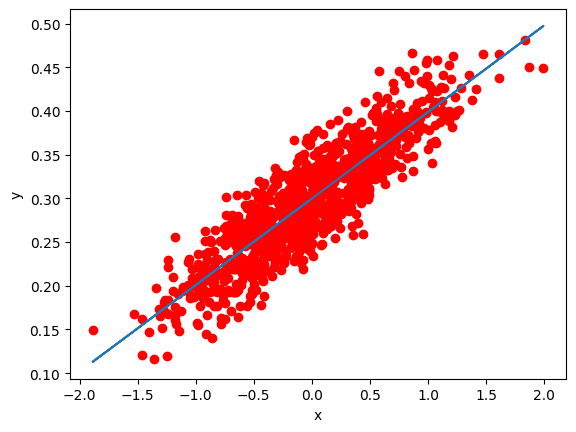

[Parameter containing:
tensor([[0.8160]], requires_grad=True), Parameter containing:
tensor([-0.8001], requires_grad=True)]
Epoch 0/110 loss: 1.4213995933532715
Epoch 10/110 loss: 0.05374964326620102
Epoch 20/110 loss: 0.01044895127415657
Epoch 30/110 loss: 0.0032151038758456707
Epoch 40/110 loss: 0.0014873761683702469
Epoch 50/110 loss: 0.0010660123080015182
Epoch 60/110 loss: 0.0009631462162360549
Epoch 70/110 loss: 0.0009380328701809049
Epoch 80/110 loss: 0.0009319015080109239
Epoch 90/110 loss: 0.000930404756218195
Epoch 100/110 loss: 0.0009300392703153193
훈련 후 입력이 10일 때의 예측값 :  tensor([[1.2937]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[0.0994]], requires_grad=True), Parameter containing:
tensor([0.2998], requires_grad=True)]


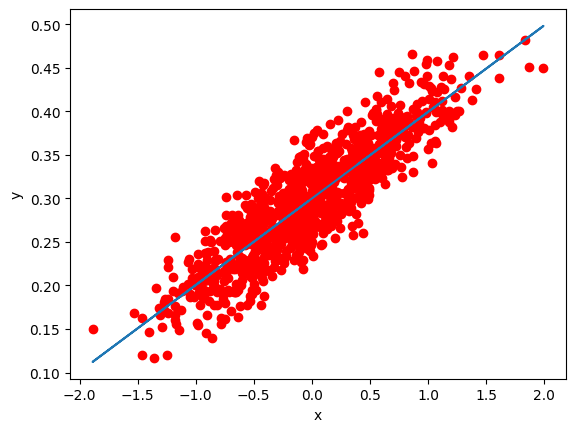

[Parameter containing:
tensor([[0.5743]], requires_grad=True), Parameter containing:
tensor([0.7029], requires_grad=True)]
Epoch 0/90 loss: 0.2318723350763321
Epoch 10/90 loss: 0.000949695473536849
Epoch 20/90 loss: 0.0009299261146225035
Epoch 30/90 loss: 0.0009299212833866477
Epoch 40/90 loss: 0.0009299212833866477
Epoch 50/90 loss: 0.0009299213415943086
Epoch 60/90 loss: 0.0009299213415943086
Epoch 70/90 loss: 0.0009299213415943086
Epoch 80/90 loss: 0.0009299213415943086
훈련 후 입력이 10일 때의 예측값 :  tensor([[1.2908]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[0.0991]], requires_grad=True), Parameter containing:
tensor([0.2998], requires_grad=True)]


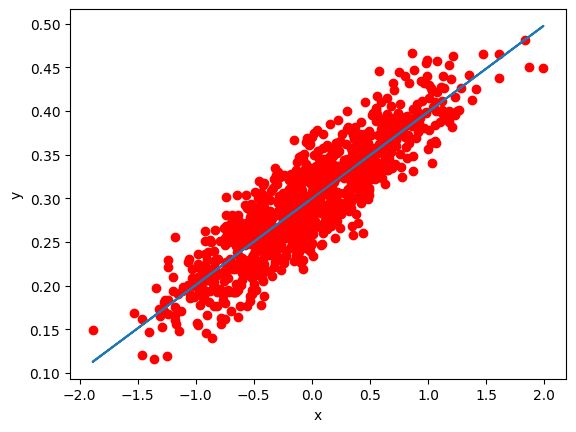

[Parameter containing:
tensor([[0.1106]], requires_grad=True), Parameter containing:
tensor([0.7111], requires_grad=True)]
Epoch 0/100 loss: 0.16995052993297577
Epoch 10/100 loss: 0.0009299751254729927
Epoch 20/100 loss: 0.0009299212251789868
Epoch 30/100 loss: 0.0009299212833866477
Epoch 40/100 loss: 0.0009299213415943086
Epoch 50/100 loss: 0.0009299213415943086
Epoch 60/100 loss: 0.0009299213415943086
Epoch 70/100 loss: 0.0009299213415943086
Epoch 80/100 loss: 0.0009299213415943086
Epoch 90/100 loss: 0.0009299213415943086
훈련 후 입력이 10일 때의 예측값 :  tensor([[1.2908]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[0.0991]], requires_grad=True), Parameter containing:
tensor([0.2998], requires_grad=True)]


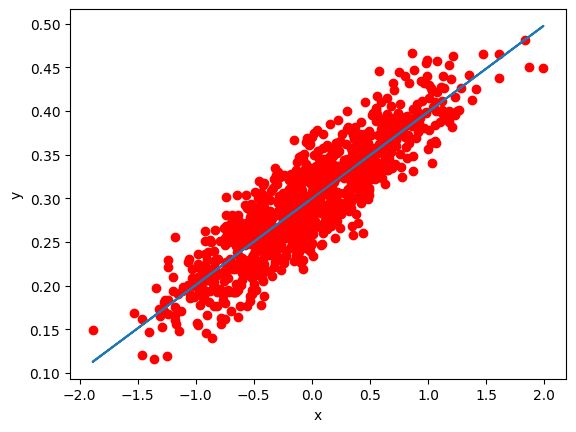

[Parameter containing:
tensor([[-0.5614]], requires_grad=True), Parameter containing:
tensor([0.1434], requires_grad=True)]
Epoch 0/110 loss: 0.16955716907978058
Epoch 10/110 loss: 0.0009665858815424144
Epoch 20/110 loss: 0.0009299301891587675
Epoch 30/110 loss: 0.0009299212833866477
Epoch 40/110 loss: 0.0009299212833866477
Epoch 50/110 loss: 0.0009299212833866477
Epoch 60/110 loss: 0.0009299212833866477
Epoch 70/110 loss: 0.0009299212833866477
Epoch 80/110 loss: 0.0009299212833866477
Epoch 90/110 loss: 0.0009299212833866477
Epoch 100/110 loss: 0.0009299212833866477
훈련 후 입력이 10일 때의 예측값 :  tensor([[1.2908]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[0.0991]], requires_grad=True), Parameter containing:
tensor([0.2998], requires_grad=True)]


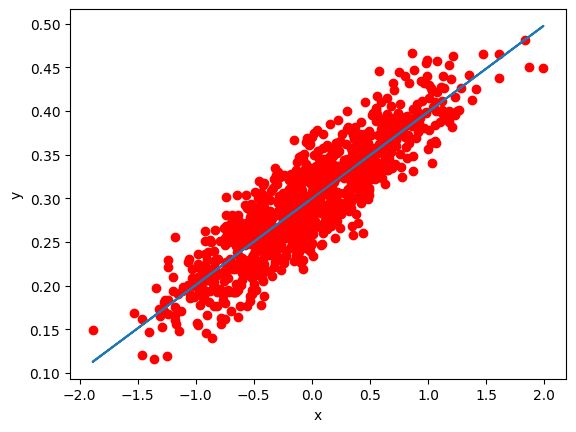

In [11]:
def models(lr, epochs):
    x_train = torch.FloatTensor(x_data).unsqueeze(dim=1)
    y_train = torch.FloatTensor(y_data).unsqueeze(dim=1)

    model = nn.Linear(1, 1)
    print(list(model.parameters()))

    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    nb_epochs = epochs

    for epoch in range(nb_epochs):
        prediction = model(x_train)
        loss = F.mse_loss(prediction, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{nb_epochs} loss: {loss.item()}")

    new_var = torch.FloatTensor([[10.0]])
    pred_y = model(new_var)
    print("훈련 후 입력이 10일 때의 예측값 : ", pred_y)

    print(list(model.parameters()))

    plt.plot(x_data, y_data, "ro")
    plt.plot(x_data, model(x_train).detach().numpy())
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

params = {
    "lr" : [0.05, 0.1, 0.5],
    "epoch" : [90, 100, 110]
}

for i in params["lr"]:
    for j in params["epoch"]:
            models(i, j)

In [12]:
# FIN